In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

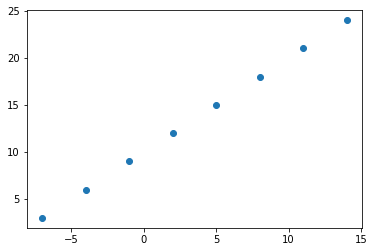

In [ ]:
x = np.array([-7, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x,y)

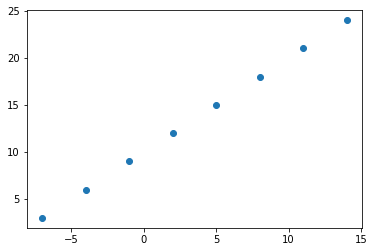

In [ ]:
x = tf.constant([-7, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x,y)

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 254ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict([10])

1/1 [==============================] - 0s 43ms/step


array([[7.5006003]], dtype=float32)

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(x, axis=-1), y, epochs=100, verbose=0)

In [ ]:
model.predict([12])

1/1 [==============================] - 0s 67ms/step


array([[21.533215]], dtype=float32)

In [ ]:
x=np.arange(-100, 100, 4)

In [ ]:
y=x+10

In [ ]:
x, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [ ]:
x_train = x[:40]
y_train = x[:40]
x_test = x[40:]
y_test = x[40:]

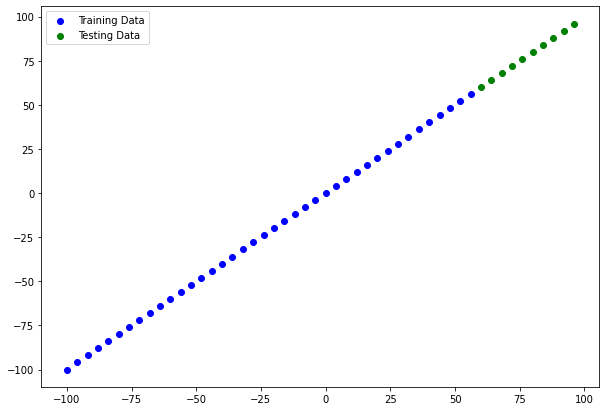

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c='b', label='Training Data')
plt.scatter(x_test, y_test, c='g', label='Testing Data')
plt.legend()

In [ ]:
from tensorflow.keras.utils import plot_model

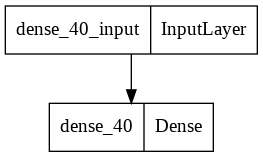

In [ ]:
plot_model(model)

In [ ]:
y_preds = model.predict(x_test)
y_preds

1/1 [==============================] - 0s 15ms/step


array([[104.33607 ],
       [111.236305],
       [118.13654 ],
       [125.03678 ],
       [131.93703 ],
       [138.83727 ],
       [145.7375  ],
       [152.63774 ],
       [159.53798 ],
       [166.43822 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', label='training_data')
  plt.scatter(test_data, test_labels, c='g', label='test_data')
  plt.scatter(test_data, predictions, c='r', label='predictions')

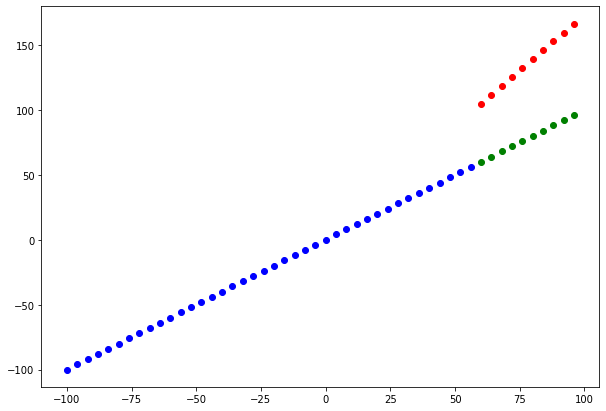

In [ ]:
plot_predictions()

In [ ]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 50ms/step


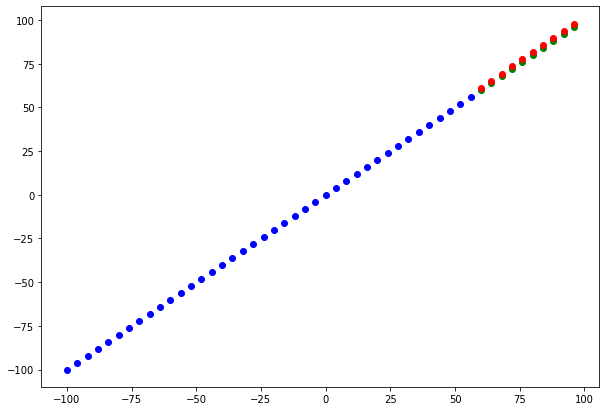

In [ ]:
y_preds_2=model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2=mae(y_test, y_preds_2.squeeze()).numpy()
mse_2=mse(y_test, y_preds_2.squeeze())
mae_2, mse_2

(1.601524, <tf.Tensor: shape=(), dtype=float32, numpy=2.6226392>)

Regression Problem

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
x=insurance_one_hot.drop("charges", axis=1)
y=insurance_one_hot["charges"]
x.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

history=insurance_model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7994.7173 - mae: 7994.7173


[7994.71728515625, 7994.71728515625]

In [ ]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history_2=insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4497.0059 - mae: 4497.0059


[4497.005859375, 4497.005859375]

Text(0.5, 0, 'epochs')

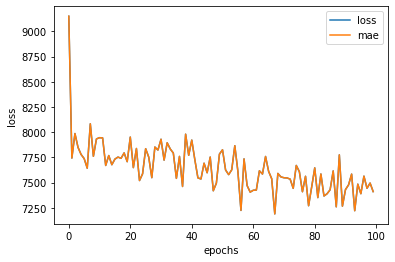

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0, 0.5, 'loss')

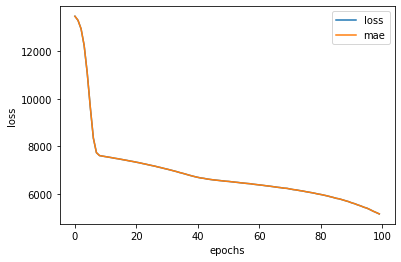

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct=make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

x=insurance.drop("charges", axis=1)
y=insurance["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ct.fit(x_train)

x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [ ]:
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history_3 = insurance_model_3.fit(x_train_normal, y_train, epochs=100, verbose=0)

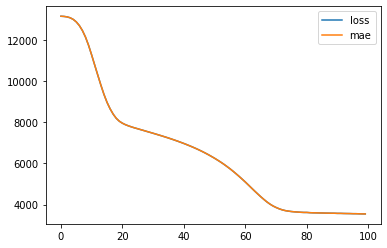

In [ ]:
pd.DataFrame(history_3.history).plot()

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

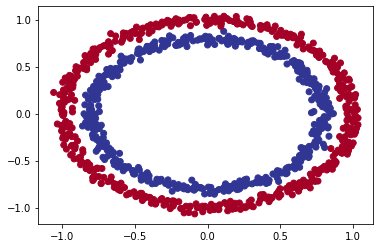

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1;
  y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1;
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(), yy.ravel()];
  y_pred=model.predict(x_in)

  if model.output_shape[-1]>1:
    y_pred=np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred=np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
  plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1=model_1.fit(x, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 907us/step


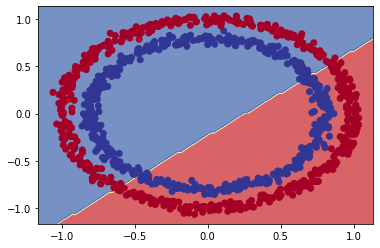

In [ ]:
plot_decision_boundary(model_1, x, y)

In [ ]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_2=model_2.fit(x_train, y_train, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step


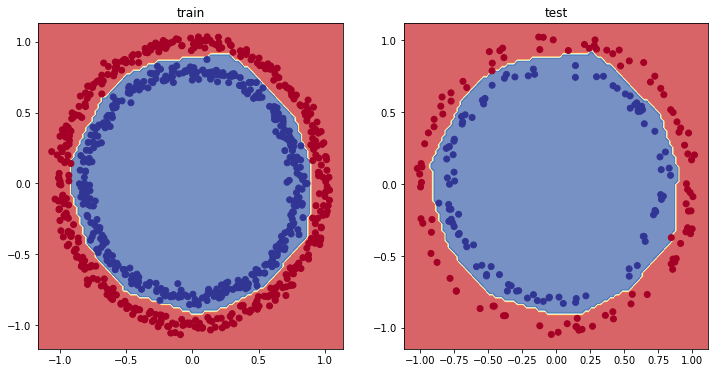

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_2, x_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_2, x_test, y_test)

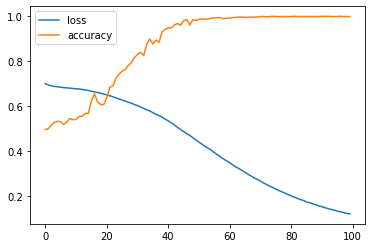

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

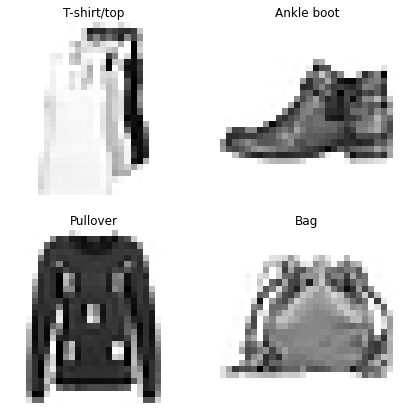

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range (4):
  ax = plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.axis(False)
  plt.title(class_names[train_labels[rand_index]])

In [ ]:
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1=model_1.fit(train_data, train_labels, epochs=10,
                      validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

Now we do the same but create it in normal form by dividing by 255

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data/255, train_labels, epochs=10,
                        validation_data=(test_data/255, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

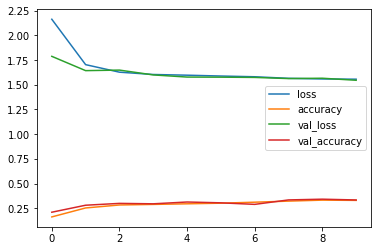

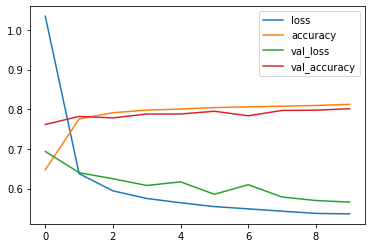

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()
pd.DataFrame(history_2.history).plot()

In [ ]:
  tf.random.set_seed(42)

  model_3=tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])
  
  lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

  history_3=model_3.fit(train_data/255, train_labels, epochs=50,
                        validation_data=(test_data/255, test_labels),
                        callbacks=[lr_scheduler])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 3s

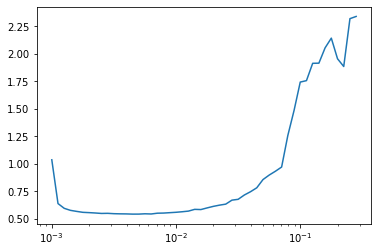

In [ ]:
lrs=1e-3*(10**(np.arange(50)/20))
plt.semilogx(lrs, history_3.history['loss'])

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs=model_2.predict(test_data)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.9121516e-27, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
y_probs[0], y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       dtype=float32), 9, 'Ankle boot')

In [ ]:
y_preds=y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 8, 7])

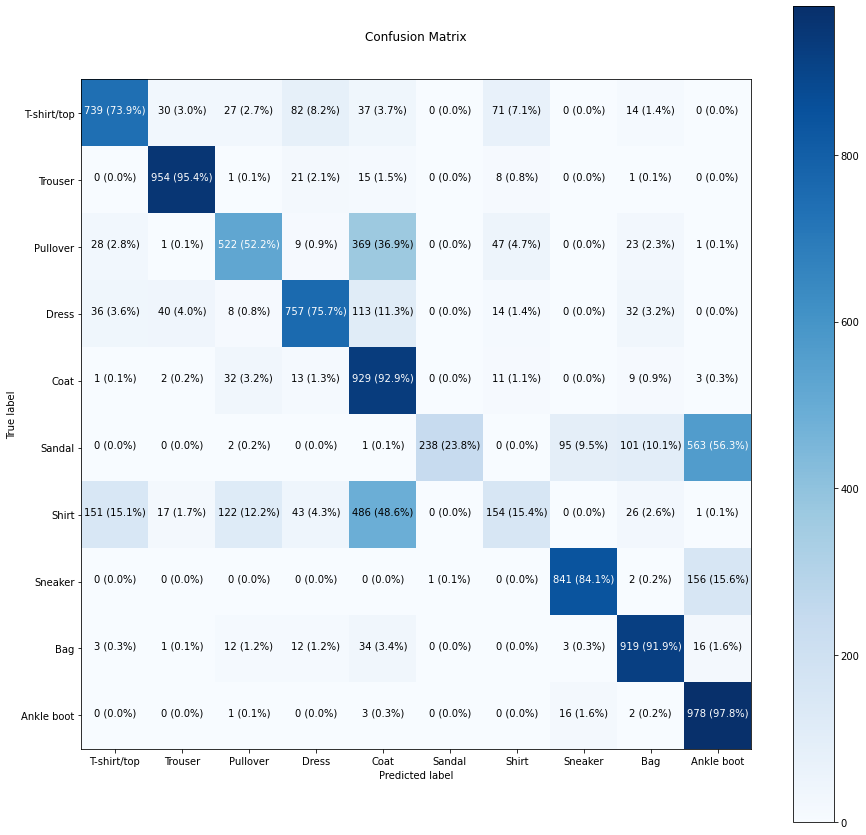

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [4]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2022-12-22 11:58:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   185MB/s    in 0.6s    

2022-12-22 11:58:06 (185 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
zip_ref=zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza


In [7]:
import pathlib
import numpy as np

data_dir=pathlib.Path('pizza_steak/train/')
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.axis(False)
  return img

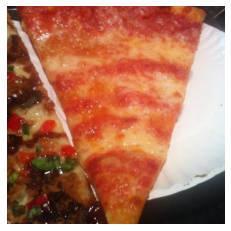

In [9]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [10]:
img.shape, img

((512, 512, 3), array([[[ 40,  21,  14],
         [ 42,  25,  17],
         [ 44,  27,  19],
         ...,
         [ 45,  41,  38],
         [ 51,  47,  44],
         [ 43,  40,  35]],
 
        [[ 34,  17,   9],
         [ 37,  20,  12],
         [ 39,  22,  14],
         ...,
         [ 45,  41,  38],
         [ 50,  47,  42],
         [ 55,  52,  47]],
 
        [[ 41,  24,  17],
         [ 41,  24,  17],
         [ 39,  24,  17],
         ...,
         [ 50,  47,  42],
         [ 43,  38,  34],
         [ 42,  37,  33]],
 
        ...,
 
        [[ 88,  73,  50],
         [122, 107,  84],
         [141, 125, 102],
         ...,
         [ 10,  11,  13],
         [  9,  10,  12],
         [ 10,  11,  13]],
 
        [[ 73,  60,  41],
         [ 96,  83,  64],
         [114,  99,  80],
         ...,
         [ 10,  11,  13],
         [ 10,  11,  13],
         [ 11,  12,  14]],
 
        [[ 73,  60,  43],
         [ 87,  74,  57],
         [ 90,  77,  60],
         ...,
         [ 10

In [11]:
img/255

array([[[0.15686275, 0.08235294, 0.05490196],
        [0.16470588, 0.09803922, 0.06666667],
        [0.17254902, 0.10588235, 0.0745098 ],
        ...,
        [0.17647059, 0.16078431, 0.14901961],
        [0.2       , 0.18431373, 0.17254902],
        [0.16862745, 0.15686275, 0.1372549 ]],

       [[0.13333333, 0.06666667, 0.03529412],
        [0.14509804, 0.07843137, 0.04705882],
        [0.15294118, 0.08627451, 0.05490196],
        ...,
        [0.17647059, 0.16078431, 0.14901961],
        [0.19607843, 0.18431373, 0.16470588],
        [0.21568627, 0.20392157, 0.18431373]],

       [[0.16078431, 0.09411765, 0.06666667],
        [0.16078431, 0.09411765, 0.06666667],
        [0.15294118, 0.09411765, 0.06666667],
        ...,
        [0.19607843, 0.18431373, 0.16470588],
        [0.16862745, 0.14901961, 0.13333333],
        [0.16470588, 0.14509804, 0.12941176]],

       ...,

       [[0.34509804, 0.28627451, 0.19607843],
        [0.47843137, 0.41960784, 0.32941176],
        [0.55294118, 0

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir='pizza_steak/train'
test_dir='pizza_steak/test'

train_data=train_datagen.flow_from_directory(train_dir, batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary', seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir, batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary', seed=42)

model_1=tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3 , activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 2, activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1=model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                      validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 700ms/step - loss: 0.6165 - accuracy: 0.6540 - val_loss: 0.4492 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5225 - accuracy: 0.7480 - val_loss: 0.3703 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 23s 479ms/step - loss: 0.5067 - accuracy: 0.7493 - val_loss: 0.3815 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.4764 - accuracy: 0.7887 - val_loss: 0.3356 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4614 - accuracy: 0.7880 - val_loss: 0.3316 - val_accuracy: 0.8540


In [14]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2022-12-22 12:04:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-12-22 12:04:09 (32.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
def load_and_prep_image(filename):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
pred=model_1.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 69ms/step


array([[0.7307975]], dtype=float32)

In [ ]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

Now CNN for multi-class classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-21 15:29:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   206MB/s    in 2.4s    

2022-12-21 15:29:43 (206 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filnames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} folders and {len(filenames)} images in {dirpath}.")

There are 2 folders and 250 images in 10_food_classes_all_data.
There are 10 folders and 250 images in 10_food_classes_all_data/train.
There are 0 folders and 250 images in 10_food_classes_all_data/train/hamburger.
There are 0 folders and 250 images in 10_food_classes_all_data/train/chicken_wings.
There are 0 folders and 250 images in 10_food_classes_all_data/train/steak.
There are 0 folders and 250 images in 10_food_classes_all_data/train/grilled_salmon.
There are 0 folders and 250 images in 10_food_classes_all_data/train/ramen.
There are 0 folders and 250 images in 10_food_classes_all_data/train/pizza.
There are 0 folders and 250 images in 10_food_classes_all_data/train/sushi.
There are 0 folders and 250 images in 10_food_classes_all_data/train/chicken_curry.
There are 0 folders and 250 images in 10_food_classes_all_data/train/fried_rice.
There are 0 folders and 250 images in 10_food_classes_all_data/train/ice_cream.
There are 10 folders and 250 images in 10_food_classes_all_data/tes

In [ ]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted(item.name for item in data_dir.glob('*')))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='categorical')

test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model_1=Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data),
                      validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 106s 2s/step - loss: 2.3371 - accuracy: 0.1164 - val_loss: 2.2848 - val_accuracy: 0.1276
Epoch 2/5
47/47 [==============================] - 103s 2s/step - loss: 2.2757 - accuracy: 0.1482 - val_loss: 2.2336 - val_accuracy: 0.1740
Epoch 3/5
47/47 [==============================] - 102s 2s/step - loss: 2.2265 - accuracy: 0.1529 - val_loss: 2.1749 - val_accuracy: 0.1900
Epoch 4/5
47/47 [==============================] - 103s 2s/step - loss: 2.1808 - accuracy: 0.1822 - val_loss: 2.1153 - val_accuracy: 0.2136
Epoch 5/5
47/47 [==============================] - 128s 3s/step - loss: 2.1529 - accuracy: 0.2174 - val_loss: 2.1075 - val_accuracy: 0.2232


In [ ]:
def pred_and_plot(model,filename,class_names):
  img=load_and_prep_image(filename)
  pred= model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0])>1:
    pred_class=class_names[pred.argmax()]
  else:
    pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 54ms/step


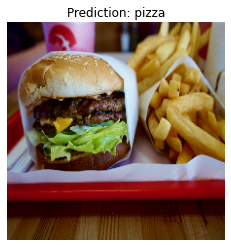

In [ ]:
pred_and_plot(model_1, "03-hamburger.jpeg", class_names)